In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',100)


In [3]:
company_url = 'https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Bank%20Loan%20Default%20-%20Casestudy/companies.txt'

rounds2_url = 'https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Bank%20Loan%20Default%20-%20Casestudy/rounds2.csv'

In [4]:
company = pd.read_csv(company_url,sep='\t', encoding='ISO-8859-1')
rounds2 = pd.read_csv(rounds2_url, sep =',',encoding='ISO-8859-1')

In [5]:
company.columns
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [6]:
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
company.shape

(66368, 10)

In [9]:
rounds2.shape

(114949, 6)

In [10]:
company.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [11]:
rounds2.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [12]:
#%%% DATA CLEANING AND VARIABLE REDUCTION


#Unique Companies in rounds2
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.lower())
rounds2['company_permalink'].unique().size


66370

In [13]:
#Unique Companies in company
company['permalink'] = company['permalink'].apply(lambda x:x.lower())
company['permalink'].unique().size

66368

In [14]:
#PrimaryKey in Company
company.head()
y = company.shape[0]-(company['permalink'].unique().size)
y
#Therefore the permalink could be the Primary key
print('Therefore the permalink could be the Primary key')

Therefore the permalink could be the Primary key


In [15]:
#Get list of companies which are there in rounds2 but not in company dataframe
rounds2[~rounds2['company_permalink'].isin(company['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [16]:
#number of companies
size = rounds2[~rounds2['company_permalink'].isin(company['permalink'])].size
size

42

In [17]:
#to join the companies we have to perform merging in both the dataframes on 'company_permalink' :
#for performing the join the column must be same
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)
rounds2.columns

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [18]:
master_dataframe = company.merge(rounds2, on = 'permalink', how = 'inner')
master_dataframe.shape
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [20]:
master_dataframe.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [21]:
master_dataframe.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [22]:
#Now removing useless columns 
master_dataframe.drop(['homepage_url','founded_at','funding_round_code','state_code','region','city'],inplace = True,axis = 1)

In [23]:
#Now Treating the Null values in DataFrame
master_dataframe.permalink.isnull().sum()

0

In [24]:
master_dataframe.name.isnull().sum()

1

In [25]:
#since the value cannot be imputed in this therefore droping this row
index = master_dataframe[master_dataframe.name.isnull()].index
master_dataframe.drop(index,inplace=True)

In [26]:
#removing rows with null values greater than 3
master_frame= master_dataframe[master_dataframe.isnull().sum(axis=1)<=3]

In [27]:
#removing the rows having null values in raised_amount_usd
master_frame= master_frame[~master_frame.raised_amount_usd.isnull()]

In [28]:
master_frame.raised_amount_usd.isnull().sum()

0

In [29]:
master_frame.shape

(94957, 9)

In [30]:
master_frame.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [31]:
#treating the rows having null values in category_list
master_frame.category_list.isnull().sum()

1044

In [32]:
master_frame= master_frame[~master_frame.category_list.isnull()]

master_frame.country_code.isnull().sum()

5385

In [33]:
master_frame= master_frame[~master_frame.country_code.isnull()]

master_frame.isnull().sum()

permalink                  0
name                       0
category_list              0
status                     0
country_code               0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [34]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88528 entries, 0 to 114940
Data columns (total 9 columns):
permalink                  88528 non-null object
name                       88528 non-null object
category_list              88528 non-null object
status                     88528 non-null object
country_code               88528 non-null object
funding_round_permalink    88528 non-null object
funding_round_type         88528 non-null object
funded_at                  88528 non-null object
raised_amount_usd          88528 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [35]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [36]:
#retained data
retained_data= round(100*len(master_frame.index)/114942,2)
retained_data

77.02

In [37]:
master_frame.columns
#best_funding_type with mean btw 5-15 million USD

master_frame.groupby('funding_round_type')['raised_amount_usd'].count()

funding_round_type
angel                     4400
convertible_note          1320
debt_financing            6506
equity_crowdfunding       1128
grant                     1939
non_equity_assistance       60
post_ipo_debt              151
post_ipo_equity            598
private_equity            1820
product_crowdfunding       330
secondary_market            28
seed                     21094
undisclosed               1345
venture                  47809
Name: raised_amount_usd, dtype: int64

In [38]:
#venture is observed to be the best Funding Type
venture_data = master_frame[master_frame['funding_round_type']=='venture']

In [39]:
#top 9 countries within the venture_data
countries = venture_data.groupby('country_code').sum()
countries
top9 = countries.sort_values(by='raised_amount_usd', ascending = False).head(9)
top9

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In [40]:
#%%
#Identifying top3 countries speaking English with top investment
venture_data.head()
top3 = venture_data.loc[(venture_data['country_code']=='IND') | (venture_data['country_code']=='USA')| (venture_data['country_code']=='GBR')]
top3.head(10)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0
38,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0
39,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0
41,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0


In [41]:
top3.shape


(38803, 9)

In [42]:
top3['category_list']

0                                                     Media
10                                                Analytics
11                                                Analytics
12                                                Analytics
22                         Apps|Cable|Distribution|Software
28                                                Education
34                                              Curated Web
38                                              Curated Web
39                                              Curated Web
41                                              Curated Web
44                                              Curated Web
59        Health Care|Health Care Information Technology...
61                                                Analytics
62                                                 Software
73                                 Biotechnology|Technology
74                                            Biotechnology
81                                      

In [43]:
top3.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [44]:
#Now splitting the category list based on delimiter and added into new column in top3 dataframe
category_data = top3['category_list'].apply(lambda x: x.split('|')[0])
category_data

0                         Media
10                    Analytics
11                    Analytics
12                    Analytics
22                         Apps
28                    Education
34                  Curated Web
38                  Curated Web
39                  Curated Web
41                  Curated Web
44                  Curated Web
59                  Health Care
61                    Analytics
62                     Software
73                Biotechnology
74                Biotechnology
81          Enterprise Software
103           Service Providers
108               Manufacturing
109               Manufacturing
110               Manufacturing
111               Manufacturing
112               Manufacturing
113               Manufacturing
114               Manufacturing
115               Manufacturing
119                 Advertising
120                 Advertising
129                    Software
134                    Software
                  ...          
114856  

In [45]:
top3['primarysector'] = category_data
top3.head(10)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,Curated Web
38,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,Curated Web
39,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,Curated Web
41,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1500000.0,Curated Web


In [46]:
top3.primarysector

0                         Media
10                    Analytics
11                    Analytics
12                    Analytics
22                         Apps
28                    Education
34                  Curated Web
38                  Curated Web
39                  Curated Web
41                  Curated Web
44                  Curated Web
59                  Health Care
61                    Analytics
62                     Software
73                Biotechnology
74                Biotechnology
81          Enterprise Software
103           Service Providers
108               Manufacturing
109               Manufacturing
110               Manufacturing
111               Manufacturing
112               Manufacturing
113               Manufacturing
114               Manufacturing
115               Manufacturing
119                 Advertising
120                 Advertising
129                    Software
134                    Software
                  ...          
114856  

In [47]:
top3.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'primarysector'],
      dtype='object')

In [48]:
#loading mapping data
mapping_url = 'https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Bank%20Loan%20Default%20-%20Casestudy/mapping.csv'
mapping_data = pd.read_csv(mapping_url, sep = ',')
mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [49]:
mapping_data.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [50]:
mapping_data.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [52]:
#converting wide dataframe into long dataframe using melt function
variables = mapping_data.columns[1:]
values = mapping_data.columns[:1]

In [53]:
values,variables

(Index(['category_list'], dtype='object'),
 Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
        'Entertainment', 'Health', 'Manufacturing',
        'News, Search and Messaging', 'Others',
        'Social, Finance, Analytics, Advertising'],
       dtype='object'))

In [54]:
mapping_long= pd.melt(mapping_data, id_vars=list(values), value_vars=list(variables),var_name='main_sector', value_name='Count')
mapping_long.columns

Index(['category_list', 'main_sector', 'Count'], dtype='object')

In [55]:
mapping_long.rename(columns = {'category_list':'primarysector'},inplace = True)

mapping_long = mapping_long[mapping_long.Count == 1]
mapping_long

,primarysector,main_sector,Count
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [56]:
dataframe = pd.merge(top3, mapping_long,how = 'inner', on='primarysector')
dataframe.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector,main_sector,Count
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,1
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment,1
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment,1
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Media,Entertainment,1
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Media,Entertainment,1


In [57]:
#Now getting the data of US based funding types with raised amount between 5 to 15 million USD

us_data = dataframe.loc[(dataframe.raised_amount_usd >= 5000000) & (dataframe.raised_amount_usd <= 15000000) & (dataframe.country_code=='USA')]

us_data.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector,main_sector,Count
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Media,Entertainment,1
14,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Media,Entertainment,1
20,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Media,Entertainment,1
21,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Media,Entertainment,1
25,/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Media,Entertainment,1


In [58]:
#Now getting the data of The Great Britain based funding types with raised amount between 5 to 15 million USD

gbr_data = dataframe.loc[(dataframe.raised_amount_usd >= 5000000) & (dataframe.raised_amount_usd <= 15000000) & (dataframe.country_code=='GBR')]

gbr_data.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector,main_sector,Count
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment,1
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment,1
137,/organization/flypay,Flypay,Apps|Customer Service|Restaurants,operating,GBR,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,16-07-2015,10700000.0,Apps,"News, Search and Messaging",1
184,/organization/kaazing,Kaazing,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,17-04-2013,15000000.0,Apps,"News, Search and Messaging",1
218,/organization/mindshapes,Mindshapes,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,01-11-2011,5000000.0,Apps,"News, Search and Messaging",1


In [59]:
#Now getting the data of India based funding types with raised amount between 5 to 15 million USD

ind_data = dataframe.loc[(dataframe.raised_amount_usd >= 5000000) & (dataframe.raised_amount_usd <= 15000000) & (dataframe.country_code=='IND')]

ind_data.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector,main_sector,Count
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,1
95,/organization/chillr-2,Chillr,Apps|Banking|Mobile Payments,operating,IND,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,02-10-2015,6000000.0,Apps,"News, Search and Messaging",1
181,/organization/jugnoo,JUGNOO,Apps|Social Business|Software,operating,IND,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,05-06-2015,5000000.0,Apps,"News, Search and Messaging",1
248,/organization/peppertap,PepperTap,Apps|Groceries|Online Shopping,operating,IND,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,14-04-2015,10000000.0,Apps,"News, Search and Messaging",1
344,/organization/tinyowl-technology,TinyOwl Technology,Apps|Mobile|Specialty Foods,operating,IND,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,30-10-2015,7665775.0,Apps,"News, Search and Messaging",1


In [60]:
#%%performing analysis on USA data

us_data.head()
#total investment that took place 
us_data.groupby('main_sector')['raised_amount_usd'].describe().sum().sum()

459748100.62419623

In [61]:
#total number of investment
us_data.groupby('main_sector')['Count'].describe().sum().sum()

11197.0

In [62]:
#Top sectors for investments
us_data.groupby('main_sector')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Automotive & Sports,167.0,8.707212e+06,2.981831e+06,5000000.0,6000000.00,8181488.0,10950000.0,15000000.0
Cleantech / Semiconductors,2297.0,9.221159e+06,3.108023e+06,5000000.0,6500000.00,9000000.0,11986707.0,15000000.0
Entertainment,580.0,8.621057e+06,3.054328e+06,5000000.0,6000000.00,8000000.0,10425000.0,15000000.0
Health,908.0,9.031783e+06,3.090433e+06,5000000.0,6100005.25,8600000.0,11200000.0,15000000.0
Manufacturing,799.0,9.084547e+06,3.010014e+06,5000000.0,6490000.00,8800000.0,11112496.5,15000000.0
"News, Search and Messaging",1563.0,8.827138e+06,3.069290e+06,5000000.0,6000000.00,8000000.0,10845000.0,15000000.0
Others,2923.0,8.925515e+06,3.064559e+06,5000000.0,6000000.00,8250000.0,11000000.0,15000000.0
"Social, Finance, Analytics, Advertising",1912.0,8.724213e+06,3.075151e+06,5000000.0,6000000.00,8000000.0,10700000.0,15000000.0


In [63]:
#it is clear from above that others sector is 1st top investing sector,Cleantech / Semiconductors is 2nd 
#Company receiving highest investment for top sector ('Others')
us_data[us_data['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head

<bound method NDFrame.head of name
Virtustream                     64300000.0
Capella Photonics               54968051.0
AirTight Networks               54201907.0
deCarta                         52100000.0
Black Duck Software             51000000.0
Approva                         50100000.0
Five9                           49600000.0
Bit9                            48433533.0
Aryaka Networks                 48166500.0
BTI Systems                     48000000.0
Change Healthcare               47000000.0
Zilliant                        45600000.0
Vormetric                       45000000.0
Redfin                          44800000.0
Elemental Technologies          44100000.0
Blazent                         44075260.0
3VR                             44000000.0
Arena Solutions                 42797302.0
Convio                          42750000.0
Taulia                          42500000.0
Colubris Networks               42000000.0
StoredIQ                        41836657.0
Appcelerator       

In [65]:
#Company receiving highest investment for 2nd Top Sector Cleantech / Semiconductors
us_data[us_data['main_sector']=='Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head()

name
Biodesix         75300000.0
Tigo Energy      68739496.0
ForSight Labs    61300001.0
Rheonix          56124758.0
SCIenergy        55375423.0
Name: raised_amount_usd, dtype: float64

In [66]:
#%%performing analysis on The great britain data

gbr_data.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector,main_sector,Count
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment,1
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment,1
137,/organization/flypay,Flypay,Apps|Customer Service|Restaurants,operating,GBR,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,16-07-2015,10700000.0,Apps,"News, Search and Messaging",1
184,/organization/kaazing,Kaazing,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,17-04-2013,15000000.0,Apps,"News, Search and Messaging",1
218,/organization/mindshapes,Mindshapes,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,01-11-2011,5000000.0,Apps,"News, Search and Messaging",1


In [67]:
#total investment that took place 
gbr_data.groupby('main_sector')['raised_amount_usd'].describe().sum().sum()

458258322.68565756

In [68]:
#total number of investment
gbr_data.groupby('main_sector')['Count'].describe().sum().sum()

625.0

In [69]:
#Top sectors for investments
gbr_data.groupby('main_sector')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Automotive & Sports,16.0,1.044072e+07,3.371176e+06,5133089.0,7489753.0,10945000.0,13000000.00,15000000.0
Cleantech / Semiconductors,127.0,8.952008e+06,2.925980e+06,5000000.0,6139545.0,8420000.0,11490000.00,15000000.0
Entertainment,54.0,8.546501e+06,2.705237e+06,5000000.0,5850000.0,8484164.0,10136282.50,15000000.0
Health,24.0,8.939063e+06,3.133502e+06,5000000.0,6299424.0,7846072.5,11512082.25,14300000.0
Manufacturing,42.0,8.617627e+06,2.762393e+06,5000000.0,6500000.0,7965208.0,10000000.00,15000000.0
"News, Search and Messaging",73.0,8.434880e+06,2.659225e+06,5000000.0,6080000.0,7520000.0,10000000.00,15000000.0
Others,143.0,8.735135e+06,2.969201e+06,5000000.0,6220000.0,8000000.0,10430688.00,15000000.0
"Social, Finance, Analytics, Advertising",98.0,8.386616e+06,2.666613e+06,5000000.0,6000000.0,8000000.0,10250557.75,15000000.0


In [70]:
#it is clear from above that others sector is 1st top investing sector,Cleantech / Semiconductors is 2nd 
#Company receiving highest investment for top sector ('Others')
gbr_data[gbr_data['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head()

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [71]:
#Company receiving highest investment for 2nd Top Sector Cleantech / Semiconductors
gbr_data[gbr_data['main_sector']=='Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head()

name
EUSA Pharma                     35600000.0
Horizon Discovery               31353719.0
F-star Biotechnology Limited    29132906.0
Elixent                         25000000.0
Takeda Cambridge                22340000.0
Name: raised_amount_usd, dtype: float64

In [72]:
#Company receiving highest investment for 2nd Top Sector Cleantech / Semiconductors
gbr_data[gbr_data['main_sector']=='Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head()

name
EUSA Pharma                     35600000.0
Horizon Discovery               31353719.0
F-star Biotechnology Limited    29132906.0
Elixent                         25000000.0
Takeda Cambridge                22340000.0
Name: raised_amount_usd, dtype: float64

In [73]:
#%%performing analysis on India data

ind_data.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primarysector,main_sector,Count
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,1
95,/organization/chillr-2,Chillr,Apps|Banking|Mobile Payments,operating,IND,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,02-10-2015,6000000.0,Apps,"News, Search and Messaging",1
181,/organization/jugnoo,JUGNOO,Apps|Social Business|Software,operating,IND,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,05-06-2015,5000000.0,Apps,"News, Search and Messaging",1
248,/organization/peppertap,PepperTap,Apps|Groceries|Online Shopping,operating,IND,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,14-04-2015,10000000.0,Apps,"News, Search and Messaging",1
344,/organization/tinyowl-technology,TinyOwl Technology,Apps|Mobile|Specialty Foods,operating,IND,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,30-10-2015,7665775.0,Apps,"News, Search and Messaging",1


In [74]:
#total investment that took place 
ind_data.groupby('main_sector')['raised_amount_usd'].describe().sum().sum()

466091378.2231298

In [75]:
#total number of investment
ind_data.groupby('main_sector')['Count'].describe().sum().sum()

347.0

In [76]:
#Top sectors for investments
ind_data.groupby('main_sector')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Automotive & Sports,13.0,1.053077e+07,3.974373e+06,5000000.0,6500000.0,11000000.0,15000000.0,15000000.0
Cleantech / Semiconductors,20.0,8.269000e+06,3.173212e+06,5000000.0,5397500.0,8000000.0,9850000.0,15000000.0
Entertainment,33.0,8.510000e+06,3.102527e+06,5000000.0,6000000.0,8000000.0,10000000.0,15000000.0
Health,19.0,8.828421e+06,2.200690e+06,5000000.0,7500000.0,9000000.0,10000000.0,13080000.0
Manufacturing,21.0,9.566667e+06,2.982798e+06,5000000.0,8000000.0,10000000.0,10000000.0,15000000.0
"News, Search and Messaging",52.0,8.342972e+06,2.698080e+06,5000000.0,5925000.0,8000000.0,10000000.0,15000000.0
Others,109.0,9.242289e+06,3.444908e+06,5000000.0,6000000.0,9000000.0,12000000.0,15000000.0
"Social, Finance, Analytics, Advertising",32.0,9.079484e+06,3.362389e+06,5000000.0,6000000.0,9000000.0,10530000.0,15000000.0


In [77]:
#it is clear from above that others sector is 1st top investing sector  News, Search and Messaging  is 2nd 
#Company receiving highest investment for top sector ('Others')
ind_data[ind_data['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head()

name
FirstCry.com         39000000.0
Myntra               38000000.0
CommonFloor          32900000.0
Pepperfry.com        28000000.0
ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

In [78]:
#Company receiving highest investment for 2nd Top Sector Cleantech / Semiconductors
ind_data[ind_data['main_sector']=='News, Search and Messaging'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head()

name
GupShup        33000000.0
IMImobile      23000000.0
SMS GupShup    22000000.0
hike           21000000.0
Roadrunnr      21000000.0
Name: raised_amount_usd, dtype: float64

In [79]:
#Box and count plot to show average investments and number of investments
filtered_df = master_frame.loc[(master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='seed') | (master_frame['funding_round_type']=='private_equity')]

In [80]:
filtered_df.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

[Text(0, 0.5, 'Average Investment Amount (USD) in Millions'),
 Text(0.5, 0, 'Investment Type')]

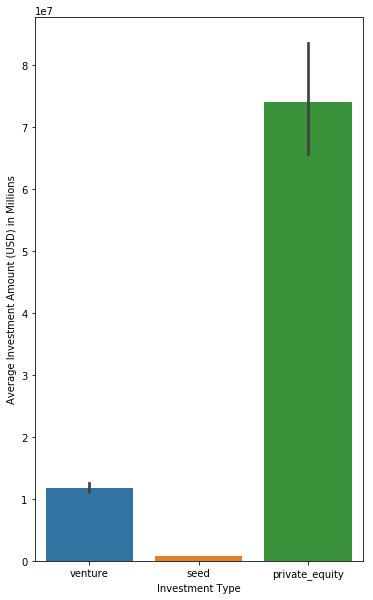

In [81]:
# subplot 1: Mean
plt.subplots(figsize=(20,10))
plt.subplot(1, 3, 1)
axis_bar = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=filtered_df)
axis_bar.set(xlabel='Investment Type', ylabel='Average Investment Amount (USD) in Millions')

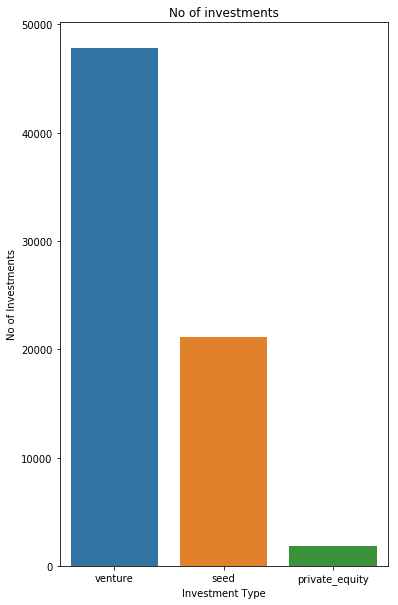

In [82]:
# subplot 2: No of investments
plt.subplots(figsize=(20,10))
plt.subplot(1, 3, 3)
axis_count = sns.countplot(x='funding_round_type' , data=filtered_df)
axis_count.set(xlabel='Investment Type', ylabel='No of Investments')
plt.title('No of investments')
plt.show()


In [83]:
#Get the data frame consisting of top 9 countries investment
top9_df = pd.DataFrame({'country_code':top9.index, 'raised_amount_usd':top9.raised_amount_usd})
top9_df

,country_code,raised_amount_usd
country_code,,
USA,USA,4.200680e+11
CHN,CHN,3.933892e+10
GBR,GBR,2.007281e+10
IND,IND,1.426151e+10
CAN,CAN,9.482218e+09
FRA,FRA,7.226851e+09
ISR,ISR,6.854350e+09
DEU,DEU,6.306922e+09
JPN,JPN,3.167647e+09


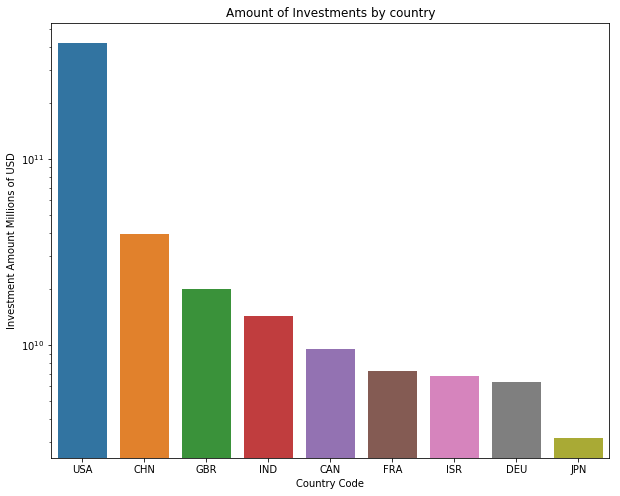

In [84]:
#Bar plot for total no of investments by country code
plt.subplots(figsize=(10,8))
axis = sns.barplot(x='country_code', y='raised_amount_usd', data=top9_df)
plt.yscale('log')
axis.set(xlabel='Country Code', ylabel='Investment Amount Millions of USD')
plt.title('Amount of Investments by country')
plt.show()

In [85]:
#Get all the sectors with investment range between 5 to 15 million
sector_df = dataframe.loc[(dataframe.raised_amount_usd >= 5000000) & (dataframe.raised_amount_usd <= 15000000)]

In [86]:
#Get the investments in the main sectors by the country code
top3_df = sector_df['main_sector'].groupby(sector_df['country_code']).value_counts()
top3_df

country_code  main_sector                            
GBR           Others                                      143
              Cleantech / Semiconductors                  127
              Social, Finance, Analytics, Advertising      98
              News, Search and Messaging                   73
              Entertainment                                54
              Manufacturing                                42
              Health                                       24
              Automotive & Sports                          16
IND           Others                                      109
              News, Search and Messaging                   52
              Entertainment                                33
              Social, Finance, Analytics, Advertising      32
              Manufacturing                                21
              Cleantech / Semiconductors                   20
              Health                                       19
              Au

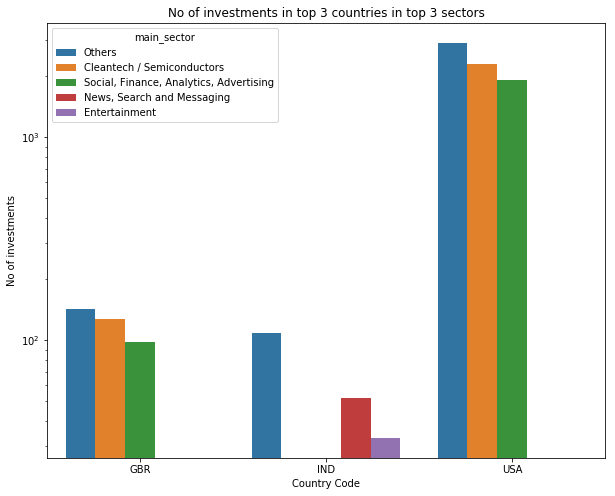

In [87]:
#Get the top 3 sectors in top 3 countries in a dataframe
top3_filtered = pd.DataFrame({'count' : top3_df.groupby( 'country_code').head(3)}).reset_index()
top3_filtered
plt.subplots(figsize=(10,8))
#Plot to show the no of investments in top 3 countries in top 3 sectors
axis = sns.barplot(x='country_code', y='count', hue='main_sector', data=top3_filtered)
plt.yscale('log')
axis.set(xlabel='Country Code', ylabel='No of investments')
plt.title('No of investments in top 3 countries in top 3 sectors')
plt.show()